# Mean field variance dynamics for noisy signal propagation

In [1]:
# imports
import os, sys, pickle
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap

# custom import
from src.numpy_simulation import *
# from src.simulation import *
from src.viz import get_colours
from src.utils import load_experiment
from src.theory import depth
from src.theory import critical_point

# plot settings
sns.set_context("paper")
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['image.cmap'] = 'viridis'

# results directory
relative_results_dir = "results"
results_dir = os.path.join(relative_results_dir)

## --- Variance map: Theory vs simulation ---

In [2]:
experiments = [
    {"dist": "bern", "noise": ('prob_1', 0.6), "act":"relu", "init":"underflow"}, 
    {"dist": "bern", "noise": ('prob_1', 0.6), "act":"relu", "init":"overflow"}, 
    {"dist": "bern", "noise": ('prob_1', 0.6), "act":"relu", "init":"crit"},
    {"dist": "mult gauss", "noise": ('std', 0.25), "act":"relu", "init":"underflow"},
    {"dist": "mult gauss", "noise": ('std', 0.25), "act":"relu", "init":"overflow"}, 
    {"dist": "mult gauss", "noise": ('std', 0.25), "act":"relu", "init":"crit"}
]

for experiment in experiments:
    dist = experiment['dist']
    noise = experiment['noise']
    act = experiment['act']
    init = experiment['init']
    
    # run simulations for scenario
    noisy_signal_prop_simulations(dist, noise, act, init)

####### EXPERIMENT: dist:  bern ;  prob_1 :  0.6 ; activation:  relu ; initialisation:  underflow ##############
qmap calculations...
Calculating Theory:



Simulating network
Single layer sims...
Compiling net...
backend is tensorflow
Do Rops...



Multi-layer sims...
Compiling net...
backend is tensorflow
Do Rops...



Cmap calculations...
General cov prop...



Specific cov prop...



Curvature prop...



General cov prop simulation...
Compiling net...
backend is tensorflow
Do Rops...



Simulate multi-layer cov prop...
Compiling net...
backend is tensorflow
Do Rops...



####### EXPERIMENT: dist:  bern ;  prob_1 :  0.6 ; activation:  relu ; initialisation:  overflow ##############
qmap calculations...
Calculating Theory:



Simulating network
Single layer sims...
Compiling net...
backend is tensorflow
Do Rops...



Multi-layer sims...
Compiling net...
backend is tensorflow
Do Rops...



Cmap calculations...
General cov prop...



Specific cov prop...



Curvature prop...



General cov prop simulation...
Compiling net...
backend is tensorflow
Do Rops...



Simulate multi-layer cov prop...
Compiling net...
backend is tensorflow
Do Rops...



####### EXPERIMENT: dist:  bern ;  prob_1 :  0.6 ; activation:  relu ; initialisation:  crit ##############
qmap calculations...
Calculating Theory:



Simulating network
Single layer sims...
Compiling net...
backend is tensorflow
Do Rops...



Multi-layer sims...
Compiling net...
backend is tensorflow
Do Rops...



Cmap calculations...
General cov prop...



Specific cov prop...



Curvature prop...



General cov prop simulation...
Compiling net...
backend is tensorflow
Do Rops...



Simulate multi-layer cov prop...
Compiling net...
backend is tensorflow
Do Rops...



####### EXPERIMENT: dist:  mult gauss ;  std :  0.25 ; activation:  relu ; initialisation:  underflow ##############
qmap calculations...
Calculating Theory:



Simulating network
Single layer sims...
Compiling net...
backend is tensorflow
Do Rops...



Multi-layer sims...
Compiling net...
backend is tensorflow
Do Rops...



Cmap calculations...
General cov prop...



Specific cov prop...



Curvature prop...



General cov prop simulation...
Compiling net...
backend is tensorflow
Do Rops...



Simulate multi-layer cov prop...
Compiling net...
backend is tensorflow
Do Rops...



####### EXPERIMENT: dist:  mult gauss ;  std :  0.25 ; activation:  relu ; initialisation:  overflow ##############
qmap calculations...
Calculating Theory:



Simulating network
Single layer sims...
Compiling net...
backend is tensorflow
Do Rops...



Multi-layer sims...
Compiling net...
backend is tensorflow
Do Rops...



Cmap calculations...
General cov prop...



Specific cov prop...


/Users/elanvanbiljon/git_repos/noisy_signal_prop/src/theory.py:110: RuntimeWarning: invalid value encountered in arcsin
  np.sqrt(1 - q12**2)/np.pi +
/Users/elanvanbiljon/git_repos/noisy_signal_prop/src/theory.py:110: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(1 - q12**2)/np.pi +



Curvature prop...



General cov prop simulation...
Compiling net...
backend is tensorflow
Do Rops...



Simulate multi-layer cov prop...
Compiling net...
backend is tensorflow
Do Rops...



####### EXPERIMENT: dist:  mult gauss ;  std :  0.25 ; activation:  relu ; initialisation:  crit ##############
qmap calculations...
Calculating Theory:



Simulating network
Single layer sims...
Compiling net...
backend is tensorflow
Do Rops...



Multi-layer sims...
Compiling net...
backend is tensorflow
Do Rops...



Cmap calculations...
General cov prop...



Specific cov prop...



Curvature prop...



General cov prop simulation...
Compiling net...
backend is tensorflow
Do Rops...



Simulate multi-layer cov prop...
Compiling net...
backend is tensorflow
Do Rops...


### Iterative variance map and variance dynamics

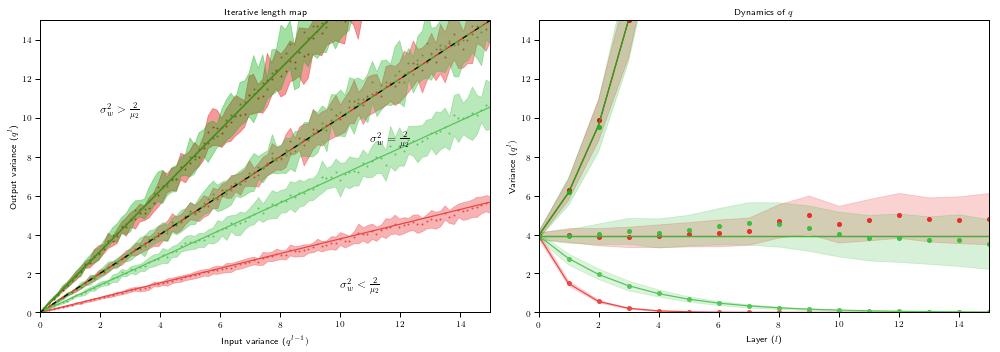

In [22]:
# Dictionary for data that needs to be extracted
tests = [
    {
        "distributions": [{"dist": "mult gauss", "std": 0.25}],
        "activations": ["relu"],
        "inits": ["underflow"]
    },
    {
        "distributions": [{"dist": "mult gauss", "std": 0.25}],
        "activations": ["relu"],
        "inits": ["overflow"]
    },
    {
        "distributions": [{"dist": "mult gauss", "std": 0.25}],
        "activations": ["relu"],
        "inits": ["crit"]
    },
    {
        "distributions": [{"dist": "bern", "prob_1": 0.6}],
        "activations": ["relu"],
        "inits": ["underflow"]
    },
    {
        "distributions": [{"dist": "bern", "prob_1": 0.6}],
        "activations": ["relu"],
        "inits": ["overflow"]
    },
    {
        "distributions": [{"dist": "bern", "prob_1": 0.6}],
        "activations": ["relu"],
        "inits": ["crit"]
    }
]

############################################################################
############################################################################
# q - length / variance plots
############################################################################
############################################################################
nq = 100
qmax = 15
qrange = np.linspace(0, qmax, nq)
widxs = [0]
bidxs = [0]
qidx = [26]
n_hidden_layers = 20

n_tests = len(tests)
pal = get_colours(10, 7)
test_data = []
for i, test in enumerate(tests):
    test_data.append(load_experiment(test, ["q_maps", "single_layer_qmap_sim", "multi_layer_qmap_sim"], "results"))


fig = plt.figure(figsize=(14, 5))

gs = plt.GridSpec(1, 2)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

# Add unity line
ax1.plot((0, qmax), (0, qmax), '--', color='k', zorder=900, dashes=(4, 8))
ax1.set_xlim(0, qmax)
ax1.set_ylim(0, qmax)
ax1.set_xlabel('Input variance ($q^{l-1})$')
ax1.set_ylabel('Output variance ($q^l$)')
ax1.set_title("Iterative length map")
ax1.text(2, 10, r'$\sigma^2_w > \frac{2}{\mu_2}$', fontsize=12)
ax1.text(10, 1, r'$\sigma^2_w < \frac{2}{\mu_2}$', fontsize=12)
ax1.text(11, 8.5, r'$\sigma^2_w = \frac{2}{\mu_2}$', fontsize=12)

# axis 2
ax2.set_xlim(0, qmax) #n_hidden_layers-1)
ax2.set_ylim(0, qmax)
ax2.set_xlabel('Layer ($l$)')
ax2.set_ylabel('Variance ($q^{l})$')
ax2.set_title("Dynamics of $q$")

nn = len(test_data)
col_i = 0
for test, attr in zip(test_data, tests):
    for dist in attr["distributions"]:
        if dist['dist'] == "none":
            col_i = 0
        elif dist['dist'] == "bern":
            col_i = 1
        elif "gauss" in dist['dist']:
            col_i = 3

        for act in attr["activations"]:
            for init in attr["inits"]:
                dashes = (None, None)
                if "under" in init:
                    shade_i = 4
                elif "crit" in init:
                    shade_i = 5
                    dashes = (8, 4) if dist['dist'] == "bern" else (None, None)
                else:
                    shade_i = 6

                # extract test data
                qmaps = test[dist['dist']][act][init]['q_maps']['qmaps']
                single_layer_sims = test[dist['dist']][act][init]['single_layer_qmap_sim']
                multi_layer_sims = test[dist['dist']][act][init]['multi_layer_qmap_sim']
                label = ""

                ############################################################################
                # left
                ############################################################################
                for w, b in zip(widxs, bidxs):

                    # plot means of simulation (as dots)
                    ax1.plot(qrange, single_layer_sims[w, b].mean(-1), w, b, marker='o', ls='none', markersize=1, alpha=0.9, zorder=0, c=pal[col_i][shade_i])

                    # add confidence interval around simulation
                    mu = single_layer_sims[w, b].mean(-1)
                    std = single_layer_sims[w, b].std(-1)
                    ax1.fill_between(qrange, mu-std, mu+std, alpha=0.4, label='_nolegend_', color=pal[col_i][shade_i])

                    # theory line
                    ax1.plot(qrange, qmaps[0, 0, :, 1], c=pal[col_i][shade_i], label=label, dashes=dashes)
                    # fixed point
                    

                ############################################################################
                # right
                ############################################################################
                q = 1
                xx = np.arange(n_hidden_layers)
                for w, b in zip(widxs, bidxs):
                    for sim in range(len(qidx)):
                        # confidence intervals
                        mu = multi_layer_sims[w, b, sim].mean(-1)
                        std = multi_layer_sims[w, b, sim].std(-1)

                        # plot theory
                        ax2.plot(qmaps[w, b, qidx[sim], :n_hidden_layers].T, c=pal[col_i][shade_i], label="Theory")

                        # plot the simulation
                        ax2.fill_between(xx, mu-std, mu+std, alpha=0.2, label='_nolegend_', color=pal[col_i][shade_i])

                        # dots for mean
                        ax2.plot(xx, mu, 'o', markersize=4, alpha=0.9, color=pal[col_i][shade_i], label="Simulation")

plt.gcf().tight_layout()
plt.show()

## --- Variance critical boundary (at the edge of underflow or overflow) ---

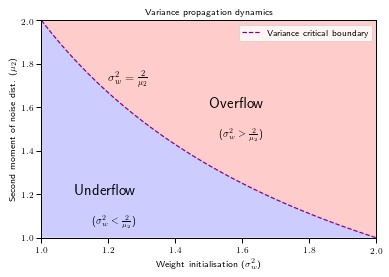

In [3]:
mu21 = np.linspace(1, 2, 100)
sigma1 = 2/mu21

plt.plot(mu21, sigma1, c="purple", label="Variance critical boundary", linestyle='--')
plt.fill_between(mu21, 1, sigma1, facecolor='blue', alpha=0.2)
plt.fill_between(mu21, 2, sigma1, facecolor='red', alpha=0.2)
plt.text(1.5, 1.6, 'Overflow', fontsize=15)
plt.text(1.53, 1.45, r'($\sigma^2_w > \frac{2}{\mu_2}$)', fontsize=10)
plt.text(1.1, 1.2, 'Underflow', fontsize=15)
plt.text(1.15, 1.05, r'($\sigma^2_w < \frac{2}{\mu_2}$)', fontsize=10)
plt.text(1.2, 1.7, r'$\sigma^2_w = \frac{2}{\mu_2}$', fontsize=12)
plt.xlim(1, 2)
plt.ylim(1, 2)
plt.xlabel('Weight initialisation ($\sigma^2_w$)')
plt.ylabel('Second moment of noise dist. ($\mu_2$)')
plt.legend()
plt.title('Variance propagation dynamics')
plt.show()

## --- Depth scales for dropout noise ---

/Users/elanvanbiljon/miniconda3/envs/noisy_signal_prop/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log
/Users/elanvanbiljon/git_repos/noisy_signal_prop/src/theory.py:206: RuntimeWarning: divide by zero encountered in log10
  ret_val[shrinking_ps] = (np.log10(shrink_value) - np.log10(q_0))/np.log10(growth_rate[shrinking_ps])


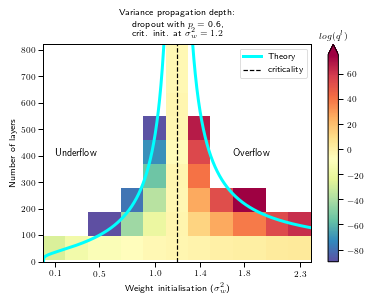

In [5]:
fig, ax = plt.subplots()
pickle_in = open("src/results/under_overflow.pk","rb")
example_dict = pickle.load(pickle_in)[:120]
p = 0.6
num_layers = 1000
nets = np.linspace(10, num_layers, 12, dtype=int)[:10]
inits = np.round(np.linspace(0.1, 2.5, 12),1)
xv, yv = np.meshgrid(nets, inits, sparse=False, indexing='ij')

Z1 = np.log(np.array(example_dict))

bad_indices = np.isnan(Z1) + np.isinf(Z1)
Z1 = np.ma.array(Z1, mask=bad_indices)
cmap = matplotlib.cm.get_cmap(name="Spectral_r")
cmap.set_bad('white', 1.)

pcm = plt.pcolormesh(yv-0.1, xv-0.1, Z1.reshape(10,12), cmap=cmap)
cbar = fig.colorbar(pcm, ax=ax, extend='max')
cbar.ax.set_title('$log(q^l)$')

plt.xlabel('Weight initialisation ($\sigma^2_w$)')

plt.ylabel("Number of layers")
plt.title("Variance propagation depth:\ndropout with $p$ = 0.6,\ncrit. init. at $\sigma^2_w = 1.2$")

max_depth = 0
init_theory = np.linspace(0, 2.4, 1000)
depth_per_p_theory = depth("Dropout", init_theory, p)
max_depth = np.max([max_depth, np.max(depth_per_p_theory)])
plt.plot(init_theory, depth_per_p_theory, label="Theory", c='cyan', linewidth=3)

# plot critical point
crit_point = critical_point("Dropout", p)
plt.plot([crit_point,]*2, [0, num_layers], color="black", linestyle="--", label="criticality")

plt.ylim(0, 820)
plt.legend()
plt.xticks(inits[:-1:2])
plt.text(0.1, 400, 'Underflow', fontsize=10)
plt.text(1.7, 400, 'Overflow', fontsize=10)
plt.show()